### The Steiner tree problem
#### Given a set of terminals $S$, find a tree that spans them with minimum total cost.
#### In the remainder of this code, we write a function to model Kou's algorithm (see notes), and then we solve a small Steiner tree problem to connect $k$ entities in the `karate_club_graph` that networkx offers.

#### On top of our traditional networkx, we now import heaps (for the algorithmic design) and random (to pick a random sample/subset of nodes to serve as terminals).

In [1]:
import networkx as nx
import heapq as hq
from random import sample

#### The next cell defines the main Steiner algorithm. It is recursive.

In [2]:
def Steiner(G, terminal_nodes):
    tree=nx.Graph()
    ### First, check for extreme cases:
    ### 1. if there are no terminal nodes to connect, then return the empty graph.
    ### 2. If there is only one terminal node, then return a singleton node.
    ### In any other case, we go to the else statement!
    if len(terminal_nodes)==0:
        return tree
    elif len(terminal_nodes)==1:
        tree.add_node(terminal_nodes[0])
        return tree
    else:
        # Create a heap
        myHeap = []
        myPaths = {}
        for i in range(len(terminal_nodes) - 1):
            ### The next few lines print a statement -- useful to monitor progress in large networks.
            a=float(i)/float(len(terminal_nodes)-1)*100
            print("%.1f" % a+"% completed")
            n1 = terminal_nodes[i]
            for n2  in terminal_nodes[i+1:]: 
                # For each pair of nodes, we calculate the shortest path between the two.
                path = nx.bidirectional_dijkstra(G, n1, n2) # path is a tuple: the first element is the distance, the second the nodes it contains
                if path == False: # if the path is not there, something is wrong!
                    terminal_nodes.remove(n2) # To solve the issue, remove the second node, print an error message, and continue
                    continue # THIS SHOULD NEVER HAPPEN! It is simply here to catch a problem with the setup.
                nodelist=path[1]
                distance=path[0]
                # Get the pair we are considering
                pair=[n1,n2]
                # Sort it (so that all terminals are from lower to higher value)
                pair.sort()
                # And push the shortest path and its distance in the heap
                myPaths["%s%s", pair[0], pair[1]]=nodelist
                hq.heappush(myHeap, (distance, pair))
        # When we have all the shortest paths, check the heap and start taking them out, cheapest one first.
        while myHeap:
            myItem=hq.heappop(myHeap)
            # This appears convoluted, but it essentially states that we will add edges to the network, 
            # if i) it is not already there, and ii) it does not form a cycle. 
            if myItem[1][0] not in tree or myItem[1][1] not in tree or not nx.has_path(tree, myItem[1][0], myItem[1][1]):
                tree.add_edge(myItem[1][0], myItem[1][1], weight=myItem[0])
        subgraph=nx.Graph()
        # For all the tree edges, add them in a new subgraph
        for e in tree.edges(data=True):
            pair = [e[0],e[1]]
            pair.sort()
            newList = myPaths["%s%s", pair[0], pair[1]]
            for i in range(len(newList) - 1):
                subgraph.add_edge(newList[i], newList[i+1])
                
        # Return the subgraph's minimum spanning tree
        subgraph = nx.minimum_spanning_tree(subgraph)
        return subgraph

#### In the next cell, we test the function. We will use the `karate_club_graph` and we will select a random subset of $k$ nodes to serve as terminal nodes for our Steiner tree.

In [3]:
G=nx.karate_club_graph()
terminal_nodes=sample(list(G.nodes()), k=6)
Steiner_tree=Steiner(G,terminal_nodes)

0.0% completed
20.0% completed
40.0% completed
60.0% completed
80.0% completed


#### Finally, we can visualize the graph. I decided to make every node that participates in the Steiner tree bigger in size than the ones that do not participate. The terminals are in red; the other nodes are in blue. The Steiner tree edges are also red and have a bigger width.

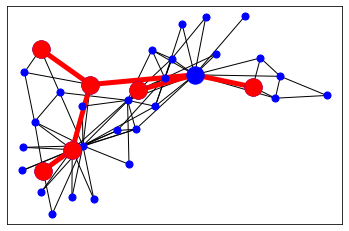

In [4]:
pos=nx.spring_layout(G)
nx.draw_networkx_edges(G,pos,edgelist=G.edges(), edge_color='k', width=1)
nx.draw_networkx_edges(G,pos,edgelist=Steiner_tree.edges(), edge_color='r', width=5)
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(), node_color='b', node_size=50)
nx.draw_networkx_nodes(G,pos,nodelist=Steiner_tree.nodes(), node_color='b')
nx.draw_networkx_nodes(G,pos,nodelist=terminal_nodes, node_color='r')